In [2]:
! pip install pymorphy3

In [3]:
import re
import pymorphy3
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Функция для очистки текста
def clean_text(text):
    # Приведение всего текста к нижнему регистру
    text = text.lower()
    
    # Разбиение текста на отдельные слова (токены)
    tokens = word_tokenize(text)
    
    # Лемматизация каждого токена
    lemmas = [morph.parse(token)[0].normal_form for token in tokens]
    
    # Удаление знаков пунктуации и стоп-слов
    cleaned_tokens = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stop_words]
    
    return cleaned_tokens
# Инициализация морфологического анализатора
morph = pymorphy3.MorphAnalyzer()
# Список стоп-слов
stop_words = stopwords.words('russian')

# Имена файлов
filenames = ['1.txt', '7.txt']

# Словарь для хранения очищенного текста
cleaned_texts = {}

In [6]:
# Загрузка и очистка файлов
for filename in filenames:
    with open(filename, 'r', encoding='utf-8') as file:
        raw_text = file.read()
        cleaned_text = clean_text(raw_text)
        cleaned_texts[filename] = cleaned_text
print(f"Общее количество очищенных токенов: {len(cleaned_texts['1.txt'])}")
# Вывод 150 первых лемм очищенного текста первого файла
print(cleaned_texts['1.txt'][:150])

Общее количество очищенных токенов: 72408
['annotation', 'скандально', 'известный', 'упасть', 'заснеженный', 'балкон', 'свой', 'пентхаус', 'разбиваться', 'насмерть', 'всё', 'решать', 'это', 'самоубийство', 'брат', 'девушка', 'мочь', 'смириться', 'вывод', 'обращаться', 'услуга', 'частное', 'сыщик', 'имя', 'корморан', 'страйк', 'страйк', 'пройти', 'война', 'пострадать', 'физически', 'душевно', 'жизнь', 'нестись', 'откос', 'рассчитывать', 'закрыть', 'хотя', 'финансовый', 'брешь', 'однако', 'расследование', 'оборачиваться', 'коварный', 'ловушка', 'углубляться', 'запутать', 'история', 'юный', 'звезда', 'страйк', 'приоткрывать', 'тайный', 'изнанка', 'событие', 'двигаться', 'навстречу', 'смертельный', 'захватывать', 'отточить', 'сюжет', 'разворачиваться', 'фон', 'лондон', 'тихий', 'улица', 'благопристойный', 'мэйфер', 'обшарпать', 'паб', 'круглосуточно', 'бурлить', 'сохо', 'зов', 'кукушка', 'незаурядный', 'заслуженно', 'популярный', 'роман', 'который', 'впервые', 'появляться', 'корморан', 'ст

In [8]:
print(f"Общее количество очищенных токенов: {len(cleaned_texts['7.txt'])}")
# Вывод 150 первых лемм очищенного текста второго файла
print(cleaned_texts['7.txt'][:150])

Общее количество очищенных токенов: 165704
['аннотация', 'гэлбрейт', 'роберт', 'неизбежный', 'могила', 'роман', 'роберт', 'гэлбрейт', 'пер', 'анга', 'елена', 'попко', 'софия', 'заика', 'дарья', 'кузнецов', 'наталья', 'кривошеев', 'евгения', 'попов', 'елизавета', 'золотарёв', 'ред', 'сергей', 'калашников', 'denmark', 'st', 'частный', 'детектив', 'корморан', 'страйком', 'связываться', 'обеспокоить', 'отец', 'чей', 'сын', 'уилла', 'присоединиться', 'религиозный', 'культ', 'образоваться', 'глубинка', 'норфолк', 'всемирный', 'гуманитарный', 'церковь', 'первый', 'взгляд', 'безобидный', 'организация', 'который', 'бороться', 'хороший', 'мир', 'всё', 'страйк', 'обнаруживать', 'внешний', 'мишура', 'скрываться', 'зловещий', 'секрет', 'необъяснимый', 'смерть', 'попытаться', 'спасти', 'уилла', 'напарница', 'агентство', 'страёк', 'робин', 'эллакотт', 'решать', 'внедриться', 'ряд', 'культ', 'отправляться', 'норфолк', 'жить', 'инкогнито', 'среди', 'последователь', 'оказываться', 'неподготовленный', 'о

Скачали оба нужных файла, выполнили предобработку и лемматизировали тексты. Теперь из этих текстов вычленяем необходимые нам слова.
Нужно найти в текстах слова, входящие в ЛСП "Преступление". Найдём их при помощи регулярных выражений. 
Отобрано больше 40 групп однокоренных слов, поэтому выражения разбиты на три части, чтобы легче было читать сами регулярные выражения и результаты поиска. 
Ниже объединим списки в один.
Создадим цикл для поиска слов.

In [183]:
# Первая группа. Очень условно: объекты и субъекты преступлений
words1 = r"преступ[а-я]*|мошенн[а-я]*|правонаруш[а-я]*|злоде[а-я]*|подозреваем[а-я]*|[а-я]*свидетел[а-я]*|пострадавш[а-я]*[а-я]*|детектив[а-я]*|полиц[а-я]*|заложн[а-я]*|жулик[а-я]*|очевид[ец][а-я]*|сыщик[а-я]*|сообщн[а-я]*|адвокат[а-я]*|\bследовател[ьяеи|ем|ей|ям|ями|ях]|бандит[а-я]*|\bжертв[аыуе|ой|ам|ами|ах]?"
# Поиск всех совпадений в первой книге
matches1_1 = []
for token in cleaned_texts['1.txt']:
    matches = re.findall(words1, token)
    if matches:
        matches1_1.extend(matches)

print(matches1_1) # Вывод первой группы результатов

['сыщик', 'детективный', 'полицейский', 'полицейский', 'полицейский', 'полицейский', 'полиция', 'полиция', 'свидетельница', 'полиция', 'жертва', 'свидетельница', 'детектив', 'жертво', 'детектив', 'адвокат', 'следователь', 'адвокат', 'полиция', 'полиция', 'полицейский', 'полиция', 'адвокат', 'полицейский', 'сыщик', 'сыщик', 'полиция', 'детектив', 'сыщик', 'адвокат', 'свидетель', 'полиция', 'адвокат', 'полиция', 'полиция', 'полиция', 'сыщик', 'свидетель', 'полицейский', 'полиция', 'полиция', 'адвокатский', 'свидетельство', 'злодей', 'полиция', 'преступление', 'адвокат', 'полиция', 'полиция', 'полиция', 'полиция', 'полицейский', 'детектив', 'злодей', 'злодей', 'преступление', 'сообщник', 'сыщик', 'полиция', 'полиция', 'злодей', 'полиция', 'полиция', 'полицейский', 'полицейский', 'полицейский', 'полиция', 'свидетель', 'полицейский', 'полицейский', 'полиция', 'полиция', 'полицейский', 'полицейский', 'адвокат', 'полиция', 'свидетельство', 'очевидец', 'полицейский', 'очевидец', 'адвокат', 'св

In [92]:
# Вторая группа. Очень условно: абстрактные понятия
words2 = r"террор[а-я]*|розыск[а-я]*|умысе?л[а-я]*|казн[ьюия][а-я]*|[а-я]*насил[а-я]*|[а-я]*смерт[а-я]*|допрос[а-я]*похи[тщ][а-я]*|уголов[а-я]*|\bмотив[аыуе|ом|ам|ами|ах]?|[а-я]*\bзакон[ауеы|ом|ами|ов|ах]?|нака[зж][а-я]*|расслед[а-я]*|криминал[а-я]*|разбой[а-я]*|показани[а-я]*|обыск[а-я]*|\bследств[а-я]*|преслед[а-я]*|обвин[а-я]*|улик[а-я]*|алиби|арест[а-я]*"
# Поиск всех совпадений
matches1_2 = []
for token in cleaned_texts['1.txt']:
    matches = re.findall(words2, token)
    if matches:
        matches1_2.extend(matches)

# Вывод второй группы результатов
print(matches1_2)

['насмерть', 'расследование', 'смертельный', 'смерть', 'смерть', 'уголовный', 'смертельно', 'смерть', 'смерть', 'смерть', 'смерть', 'расследование', 'расследование', 'смерть', 'показание', 'смерть', 'смерть', 'расследовать', 'следствие', 'смерть', 'расследование', 'расследование', 'следствие', 'закон', 'следствие', 'смерть', 'алиби', 'показание', 'смерть', 'смерть', 'уголовный', 'закон', 'закон', 'закон', 'смерть', 'закон', 'смерть', 'уголовный', 'расследовать', 'расследовать', 'смерть', 'смерть', 'смерть', 'закон', 'умысел', 'насмерть', 'мотив', 'обвинение', 'арест', 'расследование', 'смерть', 'улика', 'расследование', 'смерть', 'обыскать', 'показание', 'показание', 'расследование', 'следствие', 'насмерть', 'закон', 'смерть', 'смерть', 'смерть', 'улика', 'закон', 'уголовный', 'смерть', 'закон', 'смерть', 'закон', 'смерть', 'смерть', 'следственный', 'насильственный', 'смерть', 'посмертный', 'следствие', 'смерть', 'расследование', 'расследование', 'следствие', 'расследование', 'смерть',

In [94]:
# Третья группа. Слово "убийство" и однокоренные
words3 = r"\b(самоуби[а-я]+|\bуби[вйт][а-я]+\b)"
# Поиск всех совпадений
matches1_3 = []
for token in cleaned_texts['1.txt']:
    matches = re.findall(words3, token)
    if matches:
        matches1_3.extend(matches)

# Вывод второй группы результатов
print(matches1_3)

['самоубийство', 'убийство', 'самоубийство', 'самоубийство', 'самоубийца', 'самоубийство', 'убивать', 'самоубийство', 'самоубийство', 'убийство', 'убить', 'убивать', 'убить', 'самоубийство', 'убить', 'убийство', 'убийца', 'убийство', 'убийца', 'убийца', 'убить', 'убить', 'убийца', 'убийца', 'самоубийство', 'убийца', 'убийство', 'убивать', 'самоубийство', 'убийца', 'убийство', 'убийца', 'самоубийство', 'самоубийство', 'самоубийство', 'убийца', 'убить', 'убить', 'убийца', 'убийца', 'убийца', 'убийство', 'самоубийство', 'самоубийство', 'убийственный', 'убийца', 'убийство', 'убить', 'убийца', 'убить', 'самоубийство', 'убийство', 'самоубийца', 'убийство', 'самоубийство', 'убийство', 'самоубийство', 'самоубийца', 'самоубийство', 'самоубийство', 'самоубийство', 'убить', 'убийца', 'самоубийство', 'самоубийство', 'самоубийство', 'самоубийство', 'убить', 'убить', 'убийство', 'убийца', 'самоубийство', 'убийца', 'убитый', 'самоубийство', 'убить', 'убийство', 'убийство', 'убийство', 'самоубийство',

In [185]:
# Проделаем то же самое со вторым текстом - книгой № 7
# Первая группа. Очень условно: объекты и субъекты преступлений
words1 = r"преступ[а-я]*|мошенн[а-я]*|правонаруш[а-я]*|злоде[а-я]*|подозреваем[а-я]*|[а-я]*свидетел[а-я]*|пострадавш[а-я]*[а-я]*|детектив[а-я]*|полиц[а-я]*|заложн[а-я]*|жулик[а-я]*|очевид[ец][а-я]*|сыщик[а-я]*|сообщн[а-я]*|адвокат[а-я]*|\bследовател[ьяеи|ем|ей|ям|ями|ях]|бандит[а-я]*|\bжертв[аыуе|ой|ам|ами|ах]?"
# Поиск всех совпадений в первой книге
matches2_1 = []
for token in cleaned_texts['7.txt']:
    matches = re.findall(words1, token)
    if matches:
        matches2_1.extend(matches)

print(matches2_1) # Вывод первой группы результатов

['детектив', 'следователь', 'полиция', 'полиция', 'полиция', 'жертва', 'бандит', 'свидетель', 'адвокат', 'адвокат', 'адвокат', 'освидетельствование', 'свидетель', 'свидетель', 'полиция', 'детектив', 'детектив', 'детектив', 'детектив', 'сообщник', 'адвокат', 'адвокат', 'детектив', 'полиция', 'свидетель', 'детективный', 'детективный', 'злодей', 'детектив', 'мошенник', 'полиция', 'детектив', 'детектив', 'детектив', 'полиция', 'детективный', 'детективный', 'детектив', 'полиция', 'адвокат', 'полиция', 'адвокат', 'свидетель', 'правонарушение', 'свидетельство', 'жертво', 'преступление', 'полиция', 'полиция', 'жертва', 'полицейский', 'полицейский', 'полицейский', 'засвидетельствовать', 'полицейский', 'полицейский', 'полиция', 'полицейский', 'полицейский', 'полицейский', 'преступный', 'детектив', 'детектив', 'жертва', 'детектив', 'свидетель', 'полиция', 'полиция', 'детектив', 'свидетель', 'жертва', 'жертва', 'жертва', 'полиция', 'преступление', 'детектив', 'полиция', 'полиция', 'полиция', 'прес

In [98]:
# Вторая группа. Очень условно: абстрактные понятия
words2 = r"террор[а-я]*|розыск[а-я]*|умысе?л[а-я]*|казн[ьюия][а-я]*|[а-я]*насил[а-я]*|[а-я]*смерт[а-я]*|допрос[а-я]*похи[тщ][а-я]*|уголов[а-я]*|\bмотив[аыуе|ом|ам|ами|ах]?|[а-я]*\bзакон[ауеы|ом|ами|ов|ах]?|нака[зж][а-я]*|расслед[а-я]*|криминал[а-я]*|разбой[а-я]*|показани[а-я]*|обыск[а-я]*|\bследств[а-я]*|преслед[а-я]*|обвин[а-я]*|улик[а-я]*|алиби|арест[а-я]*"
# Поиск всех совпадений
matches2_2 = []
for token in cleaned_texts['7.txt']:
    matches = re.findall(words2, token)
    if matches:
        matches2_2.extend(matches)

# Вывод второй группы результатов
print(matches2_2)

['смерть', 'арестовать', 'преследование', 'преследование', 'показание', 'преследование', 'обвинение', 'смерть', 'смерть', 'смерть', 'смерть', 'расследование', 'смерть', 'смерть', 'законо', 'смерть', 'расследование', 'закон', 'показание', 'преследование', 'показание', 'наказание', 'предсмертный', 'расследование', 'уголовный', 'розыск', 'расследование', 'уголовный', 'розыск', 'расследование', 'закон', 'криминальный', 'закон', 'закон', 'обвинение', 'обвинение', 'насилие', 'насилие', 'расследование', 'преследование', 'показание', 'насильственный', 'уголовный', 'показание', 'закон', 'мотив', 'уголовный', 'розыск', 'следственный', 'изнасилование', 'преследоваться', 'обвинить', 'наказывать', 'наказать', 'изнасиловать', 'изнасилование', 'изнасилование', 'насильственный', 'обвинить', 'изнасилование', 'закон', 'смерть', 'смерть', 'смерть', 'смерть', 'насмерть', 'следствие', 'смерть', 'смерть', 'арестовать', 'закон', 'преследовать', 'насилие', 'обвинение', 'изнасилование', 'расследование', 'смерт

In [100]:
# Третья группа. Слово "убийство" и однокоренные
words3 = r"\b(самоуби[а-я]+|\bуби[вйт][а-я]+\b)"
# Поиск всех совпадений
matches2_3 = []
for token in cleaned_texts['7.txt']:
    matches = re.findall(words3, token)
    if matches:
        matches2_3.extend(matches)

# Вывод второй группы результатов
print(matches2_3)

['убить', 'самоубийство', 'самоубийство', 'убийство', 'убийство', 'убить', 'самоубийство', 'убийство', 'убийство', 'убийство', 'убийство', 'убить', 'убийца', 'убийца', 'убийца', 'убийство', 'убийца', 'самоубийство', 'убийца', 'самоубийство', 'самоубийство', 'самоубийство', 'самоубийство', 'убийство', 'убить', 'убить', 'убить', 'убить', 'убить', 'убивать', 'убить', 'убить', 'убийца', 'убить', 'убить', 'убить', 'самоубийство', 'убить', 'убить', 'убийца', 'убийца', 'убийство', 'убитый', 'убить', 'убийство', 'убитый', 'убить', 'убить', 'убить', 'убить', 'убить', 'убить', 'убийство', 'убить', 'убийство', 'убийство', 'убийца', 'убийство', 'убивать', 'убивать', 'убить', 'убийство', 'убивать', 'убить', 'убить', 'убить', 'убить', 'убийство', 'убийца', 'убить', 'убитый', 'убитый', 'убивать', 'самоубийство', 'убить', 'убить', 'самоубийство', 'самоубийство', 'убить', 'убийство', 'самоубийство', 'убить', 'самоубийство', 'самоубийство', 'убийство', 'убийство', 'убийство', 'убить', 'убийство', 'убийс

In [191]:
# Объединим полученные списки в один, не печатая его (книга № 1)
matches1 = matches1_1 + matches1_2 + matches1_3
# Общее количество найденных лемм в первом тексте - итоговый список
print("Общее количество лемм из ЛСП в книге № 1: ", len(matches1))
unique_lemmas1 = set(matches1)
# Вывод количества уникальных лемм
print("Количество уникальных лемм: ", len(unique_lemmas1))

Общее количество лемм из ЛСП в книге № 1:  794
Количество уникальных лемм:  75


In [193]:
# Объединим полученные списки в один, не печатая его (книга № 7)
matches2 = matches2_1 + matches2_2 + matches2_3
# Общее количество найденных лемм в первом тексте - итоговый список
print("Общее количество лемм из ЛСП в книге № 7: ", len(matches2))
unique_lemmas2 = set(matches2)
# Вывод количества уникальных лемм
print("Количество уникальных лемм: ", len(unique_lemmas2))

Общее количество лемм из ЛСП в книге № 7:  1546
Количество уникальных лемм:  94


Этап 2. Теперь займёмся изучением частоты слов в каждом из текстов.

In [196]:
# Выясним частоту встречаемости слов из ЛСП "Преступление" в первом тексте
from collections import Counter

# Подсчет частоты слов в matches1
word_frequency1 = Counter(matches1)

# Вывод результатов в порядке убывания частоты
for word, count in word_frequency1.most_common():
    print(f"{word}: {count}")

смерть: 126
полиция: 75
полицейский: 64
убийца: 40
показание: 38
адвокат: 32
убийство: 32
расследование: 31
закон: 30
самоубийство: 30
убить: 30
детектив: 22
сыщик: 19
свидетель: 16
преступление: 13
следствие: 12
алиби: 9
насмерть: 8
злодей: 7
убивать: 7
свидетельница: 6
уголовный: 6
расследовать: 6
улика: 6
насильственный: 6
самоубийца: 6
жертва: 5
следователь: 5
мотив: 5
обыскивать: 5
преследовать: 5
свидетельство: 4
преступник: 4
смертельный: 4
смертельно: 4
арест: 4
предсмертный: 4
наказать: 4
насилие: 4
смертный: 4
засвидетельствовать: 3
обвинение: 3
следственный: 3
криминальный: 3
обвинять: 3
убитый: 3
жертво: 2
сообщник: 2
очевидец: 2
свидетельствовать: 2
обыскать: 2
посмертный: 2
криминал: 2
изнасиловать: 2
розыск: 2
детективный: 1
адвокатский: 1
свидетельский: 1
заложница: 1
лжесвидетельство: 1
умысел: 1
криминалист: 1
законо: 1
насильно: 1
бессмертный: 1
уголовник: 1
преследователь: 1
наказ: 1
изнасилование: 1
обвинить: 1
преследование: 1
наказанность: 1
наказанный: 1
обыск: 

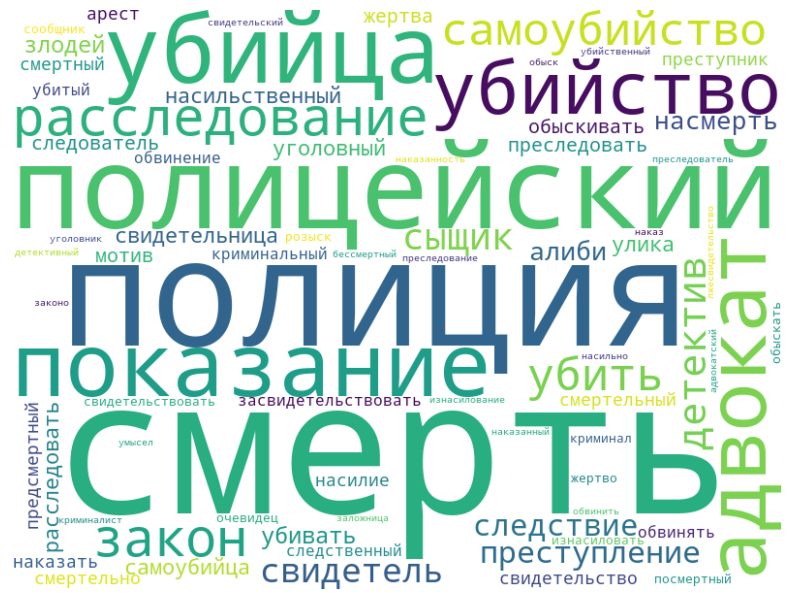

In [198]:
! pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Создание WordCloud на основе слов и их частот
wordcloud = WordCloud(width=800, height=600, background_color="white").generate_from_frequencies(word_frequency1)

# Построение графика
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

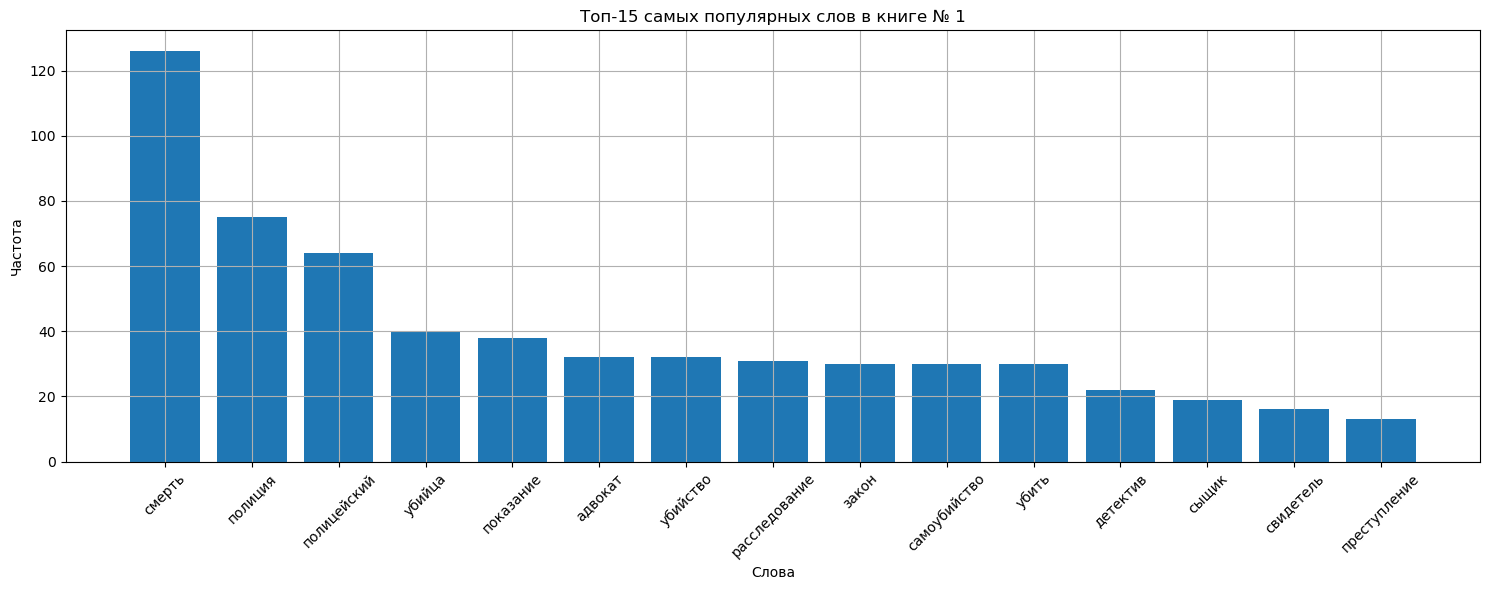

In [199]:
import matplotlib.pyplot as plt
# Отсортируем словарь по частоте
sorted_words1 = sorted(word_frequency1.items(), key=lambda x: x[1], reverse=True)
# Выберем топ-15 слов
top_words1 = dict(list(sorted_words1)[:15])

# Построение графика
plt.figure(figsize=(15, 6))
plt.bar(top_words1.keys(), top_words1.values())
plt.xticks(rotation=45)
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.title('Топ-15 самых популярных слов в книге № 1')
plt.grid(True)
plt.tight_layout()
plt.show()

In [202]:
# Выясним частоту встречаемости слов из ЛСП "Преступление" во втором тексте

# Подсчет частоты слов в matches2
word_frequency2 = Counter(matches2)

# Вывод результатов в порядке убывания частоты
for word, count in word_frequency2.most_common():
    print(f"{word}: {count}")

полиция: 194
смерть: 144
детектив: 94
закон: 87
расследование: 69
показание: 62
свидетель: 61
убить: 58
обвинение: 53
убийство: 48
полицейский: 46
адвокат: 42
наказание: 33
наказать: 31
самоубийство: 29
преследование: 27
насилие: 26
преследовать: 25
жертва: 24
преступление: 24
изнасилование: 22
убийца: 21
обвинить: 17
арестовать: 16
обвинять: 16
насиловать: 13
свидетельствовать: 11
жертво: 10
уголовный: 10
мотив: 10
арест: 10
детективный: 9
обыскать: 9
преступный: 8
преступник: 8
убивать: 8
убитый: 8
мошенник: 7
свидетельство: 7
наказывать: 7
изнасиловать: 7
следствие: 7
расследовать: 7
насильник: 7
улика: 7
следователь: 6
насильственный: 6
смертельный: 6
обыск: 6
правонарушение: 5
розыск: 5
засвидетельствовать: 4
мошенничество: 4
обыскивать: 4
свидетельница: 3
предсмертный: 3
криминальный: 3
преследователь: 3
злодей: 2
сообщница: 2
свидетельский: 2
очевидец: 2
сыщик: 2
заложник: 2
законо: 2
обвинительный: 2
алиби: 2
мотива: 2
арестовывать: 2
разбойник: 2
террорист: 2
бандит: 1
освидет

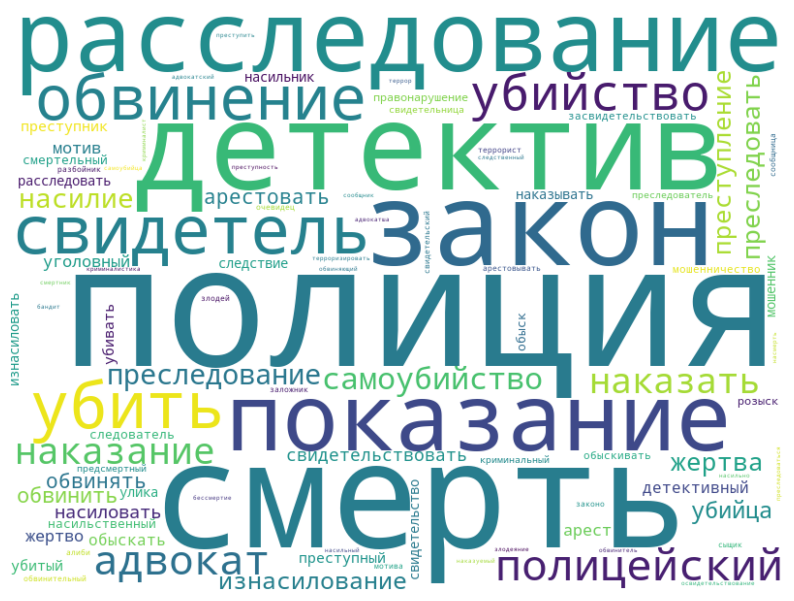

In [204]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Создание WordCloud на основе слов и их частот
wordcloud = WordCloud(width=800, height=600, background_color="white").generate_from_frequencies(word_frequency2)

# Построение графика
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

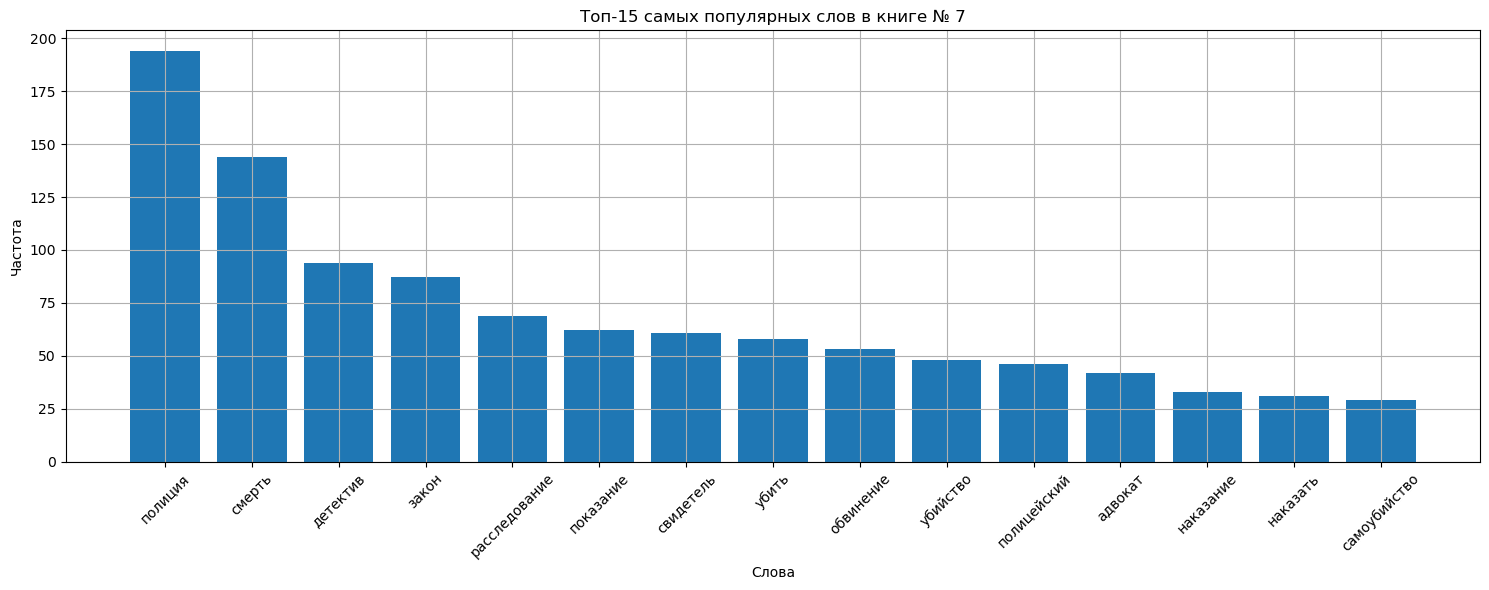

In [206]:
# Отсортируем словарь по частоте
sorted_words2 = sorted(word_frequency2.items(), key=lambda x: x[1], reverse=True)
# Выберем топ-15 слов
top_words2 = dict(list(sorted_words2)[:15])

# Построение графика
plt.figure(figsize=(15, 6))
plt.bar(top_words2.keys(), top_words2.values())
plt.xticks(rotation=45)
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.title('Топ-15 самых популярных слов в книге № 7')
plt.grid(True)
plt.tight_layout()
plt.show()

In [208]:
# Расчет относительной частоты для matches1
relative_frequencies1 = {word: freq / len(cleaned_texts['1.txt']) for word, freq in word_frequency1.items()}

# Расчет относительной частоты для matches2
relative_frequencies2 = {word: freq / len(cleaned_texts['7.txt']) for word, freq in word_frequency2.items()}

# Вывод результатов
print('Относительная частота слов из ЛСП "Преступление" в книге № 1:')
for word, rel_freq in sorted(relative_frequencies1.items(), key=lambda x: x[1], reverse=True):
    if rel_freq >= 0.0001:
        print(f"{word}: {rel_freq:.4f}")

Относительная частота слов из ЛСП "Преступление" в книге № 1:
смерть: 0.0017
полиция: 0.0010
полицейский: 0.0009
убийца: 0.0006
показание: 0.0005
адвокат: 0.0004
убийство: 0.0004
расследование: 0.0004
закон: 0.0004
самоубийство: 0.0004
убить: 0.0004
детектив: 0.0003
сыщик: 0.0003
свидетель: 0.0002
преступление: 0.0002
следствие: 0.0002
алиби: 0.0001
насмерть: 0.0001


In [210]:
print('Относительная частота слов из ЛСП "Преступление" в книге № 7:')
for word, rel_freq in sorted(relative_frequencies2.items(), key=lambda x: x[1], reverse=True):
    if rel_freq >= 0.0001:
        print(f"{word}: {rel_freq:.4f}")

Относительная частота слов из ЛСП "Преступление" в книге № 7:
полиция: 0.0012
смерть: 0.0009
детектив: 0.0006
закон: 0.0005
расследование: 0.0004
показание: 0.0004
свидетель: 0.0004
убить: 0.0004
обвинение: 0.0003
убийство: 0.0003
полицейский: 0.0003
адвокат: 0.0003
наказание: 0.0002
наказать: 0.0002
самоубийство: 0.0002
преследование: 0.0002
насилие: 0.0002
преследовать: 0.0002
жертва: 0.0001
преступление: 0.0001
изнасилование: 0.0001
убийца: 0.0001
обвинить: 0.0001


Сравним получившиеся данные между собой. 
Найдём слова, которые встречаются в обоих словарях и посмотрим на их частотность. 
В каждом словаре найдём слова, которых нет в другом словаре.
Выберем из словаря топ-15 слов, встречающихся в обоих текстах, но имеющих наибольшую разницу частот, нарисуем график.

In [213]:
# Нахождение уникальных слов и их частот
unique_in_relative_frequencies1 = {k: v for k, v in relative_frequencies1.items() if k not in relative_frequencies2}
unique_in_relative_frequencies2 = {k: v for k, v in relative_frequencies2.items() if k not in relative_frequencies1}

# Вывод результатов
print("Уникальные слова в первом словаре с их частотой:")
for word, frequency in unique_in_relative_frequencies1.items():
    print(f"{word}: {rel_freq:.6f}")

print("\nУникальные слова во втором словаре с их частотой:")
for word, frequency in unique_in_relative_frequencies2.items():
    print(f"{word}: {rel_freq:.6f}")
# Оказалось не очень информативно :)

Уникальные слова в первом словаре с их частотой:
заложница: 0.000006
лжесвидетельство: 0.000006
смертельно: 0.000006
умысел: 0.000006
посмертный: 0.000006
криминал: 0.000006
бессмертный: 0.000006
уголовник: 0.000006
наказ: 0.000006
наказанность: 0.000006
смертный: 0.000006
наказанный: 0.000006
убийственный: 0.000006

Уникальные слова во втором словаре с их частотой:
бандит: 0.000006
освидетельствование: 0.000006
мошенник: 0.000006
правонарушение: 0.000006
преступный: 0.000006
мошенничество: 0.000006
сообщница: 0.000006
преступность: 0.000006
преступить: 0.000006
адвокатша: 0.000006
заложник: 0.000006
злодеяние: 0.000006
арестовать: 0.000006
наказание: 0.000006
преследоваться: 0.000006
наказывать: 0.000006
насильный: 0.000006
бессмертие: 0.000006
насиловать: 0.000006
смертник: 0.000006
обвинительный: 0.000006
мотива: 0.000006
насильник: 0.000006
арестовывать: 0.000006
обвиняющий: 0.000006
разбойник: 0.000006
террорист: 0.000006
террор: 0.000006
терроризировать: 0.000006
обвинитель: 0.00

In [215]:
# Нахождение совпадающих слов
common_words = relative_frequencies1.keys() & relative_frequencies2.keys()
import matplotlib.pyplot as plt
import pandas as pd

# Создание таблицы с частотами
data = {
    'Слово': [],
    f'Частота: книга № 1': [],
    f'Частота: книга № 7': [],
    'Разница частот': []
}

for word in common_words:
    data['Слово'].append(word)
    first_book_freq = relative_frequencies1[word]
    seventh_book_freq = relative_frequencies2[word]
    data[f'Частота: книга № 1'].append(first_book_freq)
    data[f'Частота: книга № 7'].append(seventh_book_freq)
    data['Разница частот'].append(abs(first_book_freq - seventh_book_freq))
# Создание DataFrame и вывод таблицы
df = pd.DataFrame(data)
pd.set_option('display.width', 200)
# Сортировка по разнице частот
df_sorted = df.sort_values(by=['Разница частот'] , ascending=False)

# Вывод таблицы
print(df_sorted[:15])

            Слово  Частота: книга № 1  Частота: книга № 7  Разница частот
49         смерть            0.001740            0.000869        0.000871
58    полицейский            0.000884            0.000278        0.000606
0          убийца            0.000552            0.000127        0.000426
26      обвинение            0.000041            0.000320        0.000278
55       детектив            0.000304            0.000567        0.000263
24          сыщик            0.000262            0.000012        0.000250
41   самоубийство            0.000414            0.000175        0.000239
44        адвокат            0.000442            0.000253        0.000188
8        убийство            0.000442            0.000290        0.000152
23      показание            0.000525            0.000374        0.000151
51  преследование            0.000014            0.000163        0.000149
1       свидетель            0.000221            0.000368        0.000147
6         полиция            0.001036 

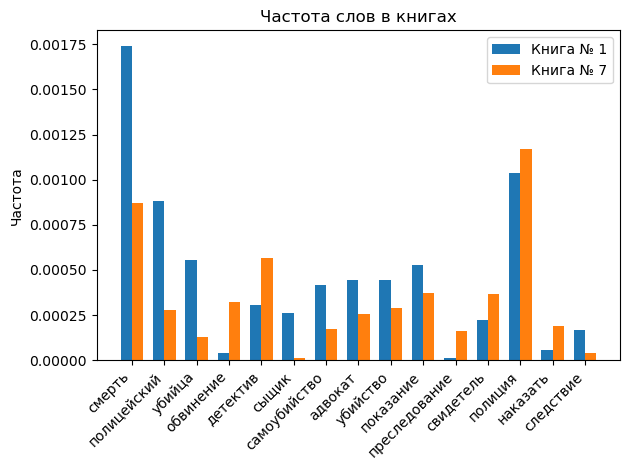

In [217]:
import matplotlib.pyplot as plt

# Данные для графика
labels = df_sorted['Слово'][:15]  # Берем первые 15 слов для наглядности
first_book_freq = df_sorted[f'Частота: книга № 1'][:15]
seventh_book_freq = df_sorted[f'Частота: книга № 7'][:15]

# Ширина столбцов
bar_width = 0.35

# Положение столбцов на графике
positions = range(len(labels))

# Создание графика
fig, ax = plt.subplots()

# Столбцы для первой книги
ax.bar(positions, first_book_freq, bar_width, label='Книга № 1')

# Столбцы для седьмой книги
ax.bar([p + bar_width for p in positions], seventh_book_freq, bar_width, label='Книга № 7')

# Настройка меток оси X
ax.set_xticks([p + bar_width / 2 for p in positions])
ax.set_xticklabels(labels, rotation=45, ha='right')

# Заголовок и легенда
ax.set_title('Частота слов в книгах')
ax.set_ylabel('Частота')
ax.legend()

# Показ графика
plt.tight_layout()
plt.show()

Перейдём к анализу частеречной принадлежности отобранных слов.

In [220]:
# Проверим, как определяется частеречная принадлежность слов, проанализировав их и выведя первые 20
from pymorphy3 import MorphAnalyzer
morph = MorphAnalyzer()
parsed_words1 = [morph.parse(word)[0].tag.POS for word in matches1]  # Анализируем все слова

# Выводим только первые 20 результатов
for i in range(min(20, len(matches1))):
    print(f"{matches1[i]}: {parsed_words1[i]}")

сыщик: NOUN
детективный: ADJF
полицейский: NOUN
полицейский: NOUN
полицейский: NOUN
полицейский: NOUN
полиция: NOUN
полиция: NOUN
свидетельница: NOUN
полиция: NOUN
жертва: NOUN
свидетельница: NOUN
детектив: NOUN
жертво: ADVB
детектив: NOUN
адвокат: NOUN
следователь: NOUN
адвокат: NOUN
полиция: NOUN
полиция: NOUN


In [222]:
# Считаем части речи, книга 1
parts_of_speech_count1 = {}

for word in matches1:
    parsed_word1 = morph.parse(word)[0]
    pos = parsed_word1.tag.POS
    
    # Обновляем счётчик для данной части речи
    if pos in parts_of_speech_count1:
        parts_of_speech_count1[pos] += 1
    else:
        parts_of_speech_count1[pos] = 1

# Выводим результат
for pos, count in parts_of_speech_count1.items():
    print(f"{pos}: {count}")

NOUN: 667
ADJF: 40
ADVB: 16
INFN: 70
PRTF: 1


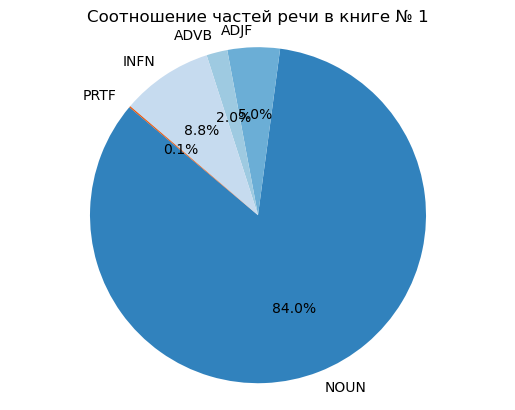

In [224]:
import matplotlib.pyplot as plt
import numpy as np
# Создание круговой диаграммы для книги № 1
labels = list(parts_of_speech_count1.keys())
sizes = list(parts_of_speech_count1.values())
colors = plt.cm.tab20c(np.arange(len(labels)))  # Использование цветовой палитры

fig, ax = plt.subplots()
textprops = {'fontsize': 3}
explode = [1] * len(labels)  # Слегка выдвинем все секторы
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
ax.axis('equal')
plt.title('Соотношение частей речи в книге № 1')
plt.show()

In [226]:
# Считаем части речи, книга 7
parts_of_speech_count2 = {}

for word in matches2:
    parsed_word2 = morph.parse(word)[0]
    pos = parsed_word2.tag.POS
    
    # Обновляем счётчик для данной части речи
    if pos in parts_of_speech_count2:
        parts_of_speech_count2[pos] += 1
    else:
        parts_of_speech_count2[pos] = 1

# Выводим результат
for pos, count in parts_of_speech_count2.items():
    print(f"{pos}: {count}")

NOUN: 1232
ADJF: 61
ADVB: 14
INFN: 238
PRTF: 1


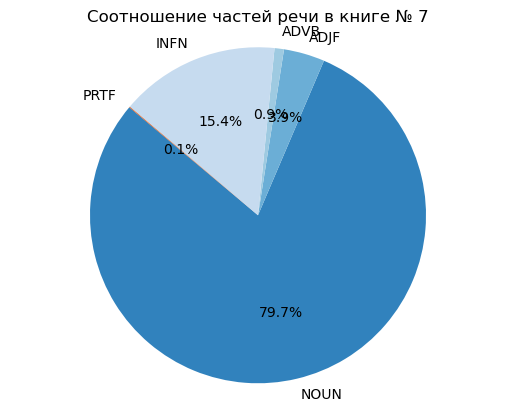

In [228]:
# Создание круговой диаграммы для книги № 7
labels = list(parts_of_speech_count2.keys())
sizes = list(parts_of_speech_count2.values())
colors = plt.cm.tab20c(np.arange(len(labels)))
fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
ax.axis('equal')
plt.title('Соотношение частей речи в книге № 7')
plt.show()

In [230]:
from collections import Counter
from math import log
matches1 = matches1_1 + matches1_2 + matches1_3
matches2 = matches2_1 + matches2_2 + matches2_3
def calculate_collocations(tokens, matches, window_size=2):
    """ Рассчитывает коллокации с использованием PMI для слов из списка matches. :param tokens: список токенов :param matches: список ключевых слов :param window_size: размер окна для поиска коллокаций :return: словарь с парами слов и их значением PMI """
    # Подсчет частот слов
    word_counts = Counter(tokens)
    total_words = sum(word_counts.values())
    
    # Подсчет частот пар слов
    pair_counts = Counter()
    for i in range(len(tokens)):
        for j in range(i + 1, min(i + window_size, len(tokens))):
            pair = tuple(sorted([tokens[i], tokens[j]]))
            if any(word in matches for word in pair):  # Учитываем только пары с words1
                pair_counts[pair] += 1
                
    # Расчет PMI
    pmi_scores = {}
    for pair, count in pair_counts.items():
        word1, word2 = pair
        joint_probability = count / total_words
        individual_probs = word_counts[word1] / total_words * word_counts[word2] / total_words
        pmi = log(joint_probability / individual_probs)
        pmi_scores[pair] = pmi
        
    return pmi_scores

# Применим функцию к исследуемым текстам
cleaned_text_1 = cleaned_texts['1.txt']
collocation_results_1 = calculate_collocations(cleaned_text_1, matches1, window_size=2)

cleaned_text_7 = cleaned_texts['7.txt']
collocation_results_7 = calculate_collocations(cleaned_text_7, matches2, window_size=2)
# Вывод результатов для первого текста
print("40 самых частотных коллокаций в тексте книги № 1 со словами из ЛСП Преступление:")
for pair, score in sorted(collocation_results_1.items(), key=lambda x: x[1], reverse=True)[:40]:
    print(f'{pair}: {score:.2f}')

40 самых частотных коллокаций в тексте книги № 1 со словами из ЛСП Преступление:
('лжесвидетельство', 'препятствование'): 11.19
('детективный', 'жанр'): 10.50
('адвокатский', 'типично'): 10.50
('адвокатский', 'убористый'): 10.50
('дебаты', 'посмертный'): 10.50
('будущее', 'заложница'): 10.50
('лжесвидетельство', 'упечь'): 10.50
('захохотать', 'обыск'): 10.50
('обвинение', 'хранение'): 10.09
('преследователь', 'психопат'): 10.09
('плаксивый', 'убитый'): 10.09
('обвинить', 'прослушка'): 10.09
('изначально', 'следователь'): 9.80
('криминал', 'прославлять'): 9.80
('наказать', 'помучить'): 9.80
('изнасиловать', 'преувеличивать'): 9.80
('вколоть', 'смертельный'): 9.80
('одр', 'смертный'): 9.80
('вырастить', 'преступник'): 9.80
('отделаться', 'преследование'): 9.58
('нагореть', 'обыскать'): 9.40
('следственный', 'упущение'): 9.40
('насильственный', 'отмести'): 9.40
('злоупотребление', 'свидетельствовать'): 9.40
('доза', 'смертельный'): 9.40
('обдолбаться', 'свидетельница'): 9.40
('потребность

In [247]:
# В самых частотных коллокация нет самого слова предспление. Проверим его
print("Коллокации из книги № 1 со словом преступление:")
for pair, score in sorted(collocation_results_1.items(), key=lambda x: x[1], reverse=True):
    if "преступление" in pair:
        print(f'{pair}: {score:.2f}')

Коллокации из книги № 1 со словом преступление:
('преступление', 'раскрытие'): 8.63
('преступление', 'состав'): 7.53
('преступление', 'сексуальный'): 7.24
('преступление', 'следователь'): 7.24
('преступление', 'уголовный'): 6.83
('преступление', 'расследовать'): 6.83
('насильственный', 'преступление'): 6.83
('получать', 'преступление'): 6.83
('жестокий', 'преступление'): 6.68
('преступление', 'совершить'): 6.55
('знак', 'преступление'): 5.99
('место', 'преступление'): 5.60
('преступление', 'сквозь'): 5.41
('ага', 'преступление'): 5.26
('преступление', 'случай'): 4.73
('десять', 'преступление'): 4.67
('именно', 'преступление'): 4.64
('ночь', 'преступление'): 4.28
('выйти', 'преступление'): 4.07
('преступление', 'это'): 2.47


In [231]:
# Посмотрим на коллокации с самым частотным словом книги № 1
dead = 'смерть'
collocation_results_dead = calculate_collocations(cleaned_text_1, [dead], window_size=2)
print('Коллокации в тексте книги № 1 со словом "смерть":')
for pair, score in sorted(collocation_results_dead.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f'{pair}: {score:.2f}')

Коллокации в тексте книги № 1 со словом "смерть":
('смерть', 'спекулировать'): 6.35
('санкция', 'смерть'): 6.35
('возбудимый', 'смерть'): 6.35
('отдалиться', 'смерть'): 6.35
('папин', 'смерть'): 6.35
('писаться', 'смерть'): 6.35
('отсрочка', 'смерть'): 6.35
('противоречивый', 'смерть'): 6.35
('иждивенец', 'смерть'): 6.35
('объявлять', 'смерть'): 6.35
('положительный', 'смерть'): 6.35
('бедняга', 'смерть'): 6.35
('насильственный', 'смерть'): 5.95
('лето', 'смерть'): 5.66
('ненастье', 'смерть'): 5.66
('побывать', 'смерть'): 5.66
('неожиданность', 'смерть'): 5.66
('расколоть', 'смерть'): 5.66
('перепугать', 'смерть'): 5.44
('помышлять', 'смерть'): 5.26


In [232]:
# Вывод результатов для второго текста
print("40 самых частотных коллокаций книги № 7 со словами из ЛСП Преступление:")
for pair, score in sorted(collocation_results_7.items(), key=lambda x: x[1], reverse=True)[:40]:
    print(f'{pair}: {score:.2f}')

40 самых частотных коллокаций книги № 7 со словами из ЛСП Преступление:
('досадный', 'освидетельствование'): 12.02
('прокусить', 'сообщник'): 12.02
('жилет', 'смертник'): 12.02
('террор', 'фашистский'): 12.02
('восхождение', 'сообщница'): 11.32
('адвокатша', 'силиконовый'): 11.32
('злодей', 'логово'): 11.32
('бондиана', 'злодей'): 11.32
('бандит', 'непредсказуемый'): 10.92
('бандит', 'классификация'): 10.92
('отнюдь', 'преследоваться'): 10.92
('вывезти', 'насильно'): 10.92
('обвинительный', 'приговор'): 10.63
('клептократия', 'мошенничество'): 10.63
('свидетельский', 'трибуна'): 10.63
('крылатый', 'разбойник'): 10.63
('алиби', 'железный'): 10.63
('освидетельствование', 'психиатрический'): 10.23
('переговоры', 'террорист'): 10.23
('преследователь', 'просидеть'): 10.23
('насильный', 'похищение'): 10.07
('мошенник', 'стая'): 10.07
('мошенник', 'обманщик'): 10.07
('мошенник', 'шарлатан'): 10.07
('кузина', 'убитый'): 9.94
('пособничество', 'преступник'): 9.94
('закоренелый', 'преступник'): 

In [245]:
# В самых частотных коллокациях нет самого слова предспление. Проверим его
print("Коллокации из книги № 7 со словом преступление:")
for pair, score in sorted(collocation_results_7.items(), key=lambda x: x[1], reverse=True):
    if "преступление" in pair:
        print(f'{pair}: {score:.2f}')

Коллокации из книги № 7 со словом преступление:
('наказуемый', 'преступление'): 8.84
('преступление', 'считаться'): 7.17
('преступление', 'уголовный'): 6.54
('кнут', 'преступление'): 6.35
('многочисленный', 'преступление'): 6.20
('намёк', 'преступление'): 6.13
('описание', 'преступление'): 6.13
('военный', 'преступление'): 5.95
('предположительно', 'преступление'): 5.80
('заключаться', 'преступление'): 5.62
('преступление', 'сексуальный'): 5.51
('кайло', 'преступление'): 5.47
('преступление', 'совершить'): 5.47
('преступление', 'приходиться'): 5.41
('преступление', 'согласный'): 5.37
('внешний', 'преступление'): 5.28
('купить', 'преступление'): 4.93
('преступление', 'чертовый'): 4.85
('преступление', 'спрашивать'): 4.83
('место', 'преступление'): 4.61
('здание', 'преступление'): 4.58
('отправить', 'преступление'): 4.51
('преступление', 'проблема'): 4.19
('преступление', 'следующий'): 4.09
('отношение', 'преступление'): 3.93
('действительно', 'преступление'): 3.88
('найти', 'преступлени

In [236]:
# Посмотрим на коллокации с самым частотным словом книги № 7
police = 'полиция'
collocation_results_police = calculate_collocations(cleaned_text_7, [police], window_size=2)
# Вывод результатов для первого текста
print('Коллокации в тексте книги № 1 со словом "полиция":')
for pair, score in sorted(collocation_results_police.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f'{pair}: {score:.2f}')

Коллокации в тексте книги № 1 со словом "полиция":
('нагрянуть', 'полиция'): 6.75
('двадцатка', 'полиция'): 6.75
('полиция', 'столичный'): 6.75
('ведомо', 'полиция'): 6.75
('обуревать', 'полиция'): 6.75
('омрачить', 'полиция'): 6.75
('перегрузить', 'полиция'): 6.34
('нрав', 'полиция'): 6.34
('домовладелец', 'полиция'): 6.06
('коррумпировать', 'полиция'): 6.06
('блеф', 'полиция'): 6.06
('контактировать', 'полиция'): 6.06
('бездействие', 'полиция'): 6.06
('полиция', 'слить'): 6.06
('полиция', 'применять'): 6.06
('малолетний', 'полиция'): 6.06
('полиция', 'сдаться'): 5.94
('долбать', 'полиция'): 5.65
('краузеры', 'полиция'): 5.65
('допросить', 'полиция'): 5.65


Краткий итог: изучение частот даёт большие возможности для анализа текста с точки зрения не только граматики, но и семантики.